In [33]:
!pip install sodapy

import pandas as pd
from sodapy import Socrata
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import numpy as np

In [14]:
#get the dataset
client = Socrata("data.cityofnewyork.us", None)

#first 2000 entries
results = client.get("ebb7-mvp5", limit = 10000)

#convert to pandas dataframe
results_df = pd.DataFrame.from_records(results)

#land area in each boroughs in order Manhattan, Bronx, Brooklyn, Queens, Staten Island 
land_area = [58.8, 109.3, 179.7, 281.5, 148.9] #square km

#population df
pop_df = pd.read_csv('population.csv')

pop_2010 = pd.read_csv('pop2010.csv')
pop_2010['land_area'] = land_area
pop_2010['pop_density'] = pop_2010['Total_POP']/pop_2010['land_area']

pop_2020 = pd.read_csv('pop2020.csv')
pop_2020['land_area'] = land_area
pop_2020['pop_density'] = pop_2020['Total_POP']/pop_2020['land_area']


In [15]:
pop_2010.head()

,Borough,Total_POP,House_POP,HOUSE_SZ,U18_POP,Total_HU,OCC_HU,VAC_HU,land_area,pop_density
0,Manhattan,1585873,1518500,1.99,234435,847090,763846,83244,58.8,26970.629252
1,Bronx,1385108,1338398,2.77,368196,511896,483449,28447,109.3,12672.534309
2,Brooklyn,2504700,2469091,2.69,594378,1000293,916856,83437,179.7,13938.230384
3,Queens,2230722,2202722,2.82,461901,835127,780117,55010,281.5,7924.412078
4,Staten Island,468730,460892,2.78,109201,176656,165516,11140,148.9,3147.951645


In [16]:
pop_2020.head()

,Borough,Total_POP,House_POP,HOUSE_SZ,U18_POP,Total_HU,OCC_HU,VAC_HU,land_area,pop_density
0,Manhattan,1694251,1616716,1.98,232511,913926,817782,96144,58.8,28813.792517
1,Bronx,1472654,1419839,2.72,349579,547030,522450,24580,109.3,13473.504117
2,Brooklyn,2736074,2690128,2.66,595703,1077654,1009804,67850,179.7,15225.787423
3,Queens,2405464,2370367,2.80,455995,896333,847210,49123,281.5,8545.165187
4,Staten Island,495747,488412,2.82,106354,183692,173202,10490,148.9,3329.395567


In [23]:
#pop density change
pop_df['pop_density'] = (pop_2020['pop_density'] - pop_2010['pop_density'])/pop_2010['pop_density'] * 100
pop_df.head()

,Borough,Total_POP,House_POP,HOUSE_SZ,U18_POP,Total_HU,OCC_HU,VAC_HU,pop_density
0,Manhattan,6.8,6.5,-0.5,-0.8,7.9,7.1,15.5,6.833965
1,Bronx,6.3,6.1,-1.8,-5.1,6.9,8.1,-13.6,6.320518
2,Brooklyn,9.2,9.0,-1.1,0.2,7.7,10.1,-18.7,9.237593
3,Queens,7.8,7.6,-0.7,-1.3,7.3,8.6,-10.7,7.833428
4,Staten Island,5.8,6.0,1.4,-2.6,4.0,4.6,-5.8,5.763873


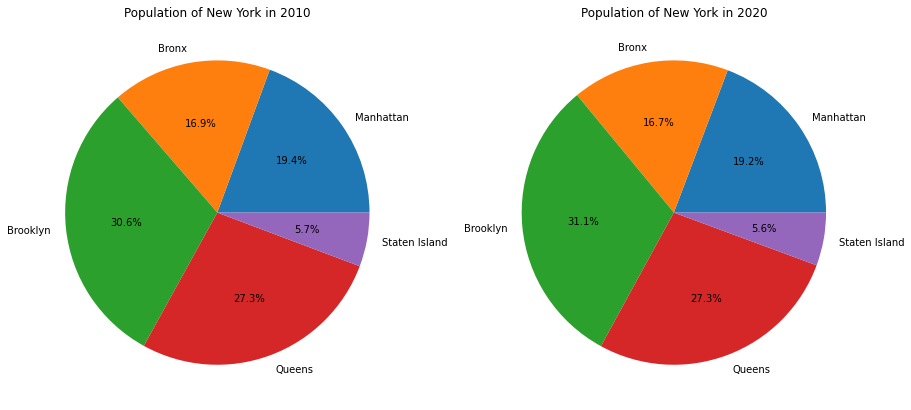

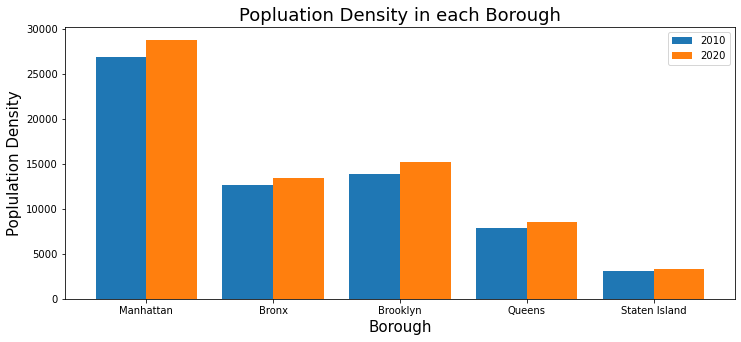

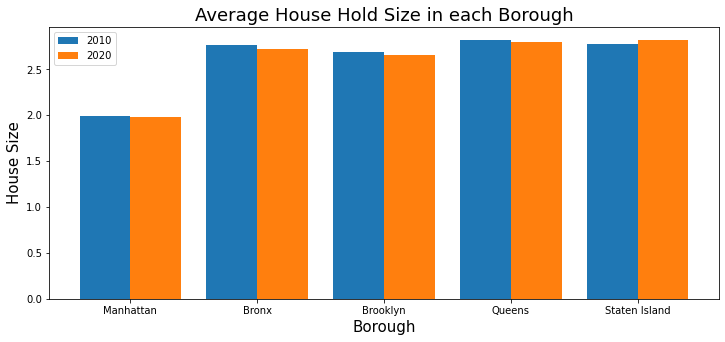

In [47]:
plt.figure(figsize = (15, 8))
plt.subplot(1, 2, 1)
plt.pie(pop_2010["Total_POP"], labels = pop_2010["Borough"], autopct='%1.1f%%')
plt.title('Population of New York in 2010')

plt.subplot(1, 2, 2)
plt.pie(pop_2020["Total_POP"], labels = pop_2010["Borough"], autopct='%1.1f%%')
plt.title('Population of New York in 2020')
plt.show()

# pop_2010.plot(kind = 'bar', x = 'Borough', y = 'pop_density', figsize = (12, 5), \
#             title = 'Population Density of New York 2010', \
#             ylabel = 'Percentage')

plt.figure(figsize = (12, 5))
labels = pop_2010['Borough'].to_list()
x_axis = np.arange(len(labels))
plt.bar(x_axis - 0.2, pop_2010['pop_density'], 0.4, label = '2010')
plt.bar(x_axis + 0.2, pop_2020['pop_density'], 0.4, label = '2020')
plt.xticks(x_axis, labels)
plt.xlabel('Borough', fontsize = 15)
plt.ylabel('Poplulation Density', fontsize = 15)
plt.title('Popluation Density in each Borough', fontsize = 18)
plt.legend()
plt.show()

plt.figure(figsize = (12, 5))
labels = pop_2010['Borough'].to_list()
x_axis = np.arange(len(labels))
plt.bar(x_axis - 0.2, pop_2010['HOUSE_SZ'], 0.4, label = '2010')
plt.bar(x_axis + 0.2, pop_2020['HOUSE_SZ'], 0.4, label = '2020')
plt.xticks(x_axis, labels)
plt.xlabel('Borough', fontsize = 15)
plt.ylabel('House Size', fontsize = 15)
plt.title('Average House Hold Size in each Borough', fontsize = 18)
plt.legend()
plt.show()

The population dataframe only has the change of population (percentage) data from 2010 to 2020.

<AxesSubplot:title={'center':'Population Density Change 2010 - 2020'}, xlabel='Borough', ylabel='Percentage'>

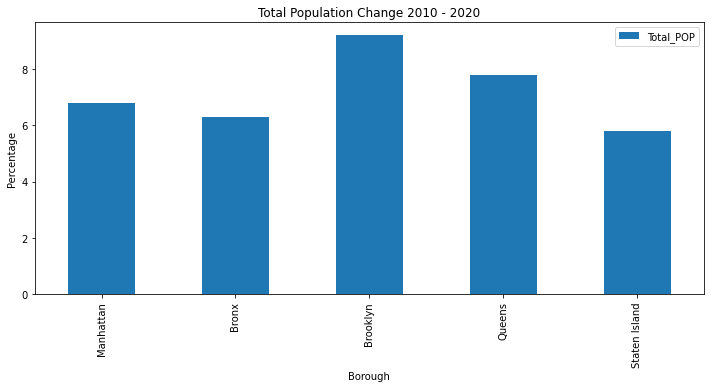

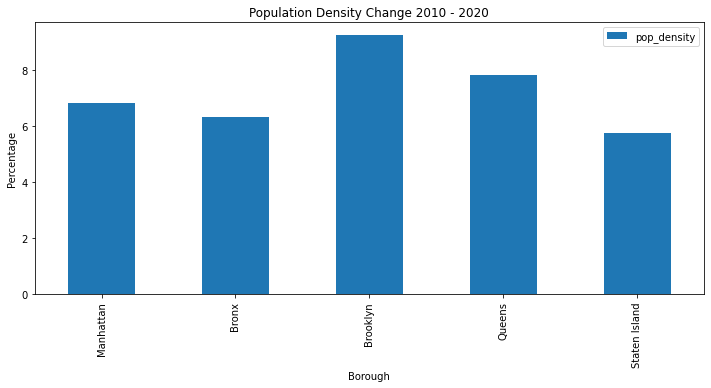

In [45]:
pop_df.head()
pop_df.plot(kind = 'bar', x = 'Borough', y = 'Total_POP', figsize = (12, 5), title = 'Total Population Change 2010 - 2020', \
            ylabel = 'Percentage')

pop_df.plot(kind = 'bar', x = 'Borough', y = "pop_density", figsize = (12, 5), title = 'Population Density Change 2010 - 2020',\
           ylabel = 'Percentage')

In [29]:
df2.groupby(['y']).sum()

,borough_id,refusetonscollected,papertonscollected,mgptonscollected,m
y,,,,,
2010,1932.0,2534394.14,299358.80,220876.47,4602
2011,1932.0,2663827.48,301955.40,219437.64,4602
2012,1932.0,2586976.77,283162.72,211630.59,4602
2013,1932.0,2553355.77,284063.67,219804.11,4602
2014,1932.0,2528441.99,288734.59,234964.49,4602
2015,1932.0,2498989.36,292721.42,251377.87,4602
2016,1932.0,2503021.42,299343.15,275261.81,4602
2017,1932.0,2504632.22,294062.33,283441.56,4602
2018,1932.0,2528011.05,303126.49,290269.46,4602


In [48]:
columns = ["month", "borough_id", "borough", "communitydistrict", "refusetonscollected", "papertonscollected", "mgptonscollected"]

df = results_df[columns]

#clean the dataset
def get_year(x):
    y = x.split('/')[0]
    return int(y)

def get_month(x):
    m = x.split('/')[1]
    return int(m)


df['y'] = df['month'].apply(get_year)
df['m'] = df['month'].apply(get_month)

df['borough_id'] = pd.to_numeric(df['borough_id'])
df['refusetonscollected'] = pd.to_numeric(df['refusetonscollected'])
df['papertonscollected'] = pd.to_numeric(df['papertonscollected'])
df['mgptonscollected'] = pd.to_numeric(df['mgptonscollected'])


In [129]:
from sklearn.linear_model import LinearRegression
import numpy as np



def lin_reg(x, y):
    
    lr = LinearRegression()
    
    lr.fit(x, y)
    x_new = np.array([[2022], [2023], [2024], [2025]])
    x_preds = np.append(x, x_new)
    x_preds = x_preds.reshape(len(x_preds), -1)
    
    y_preds = lr.predict(x_preds)
    
    return x_preds, y_preds


[]

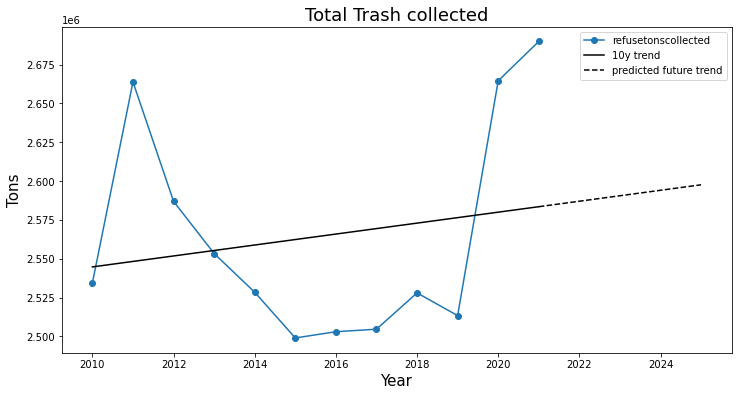

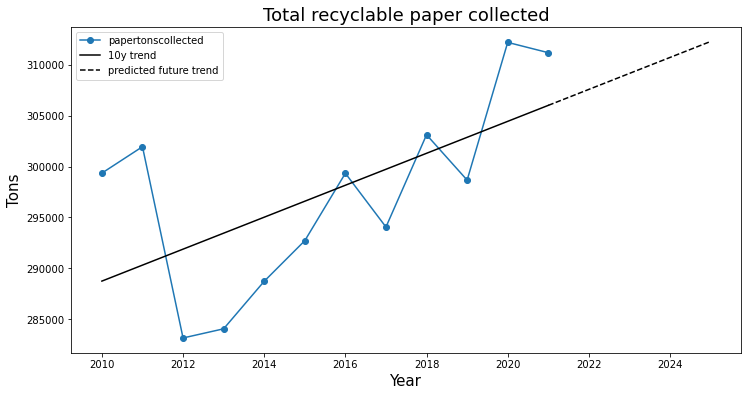

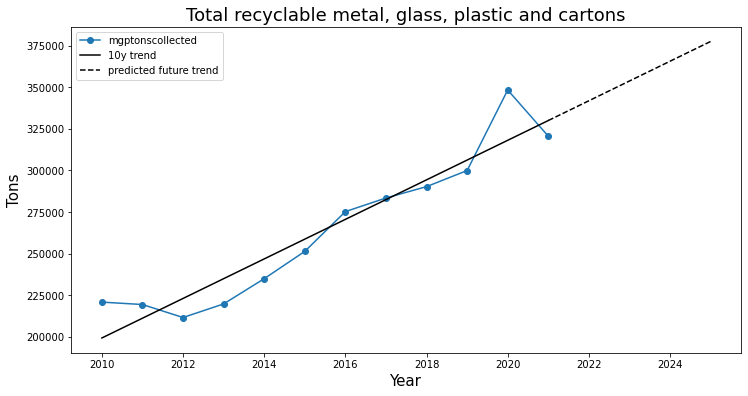

In [133]:
#get data from 2010 - 2020
df2 = df[(df['y'] >= 2010) & (df['y'] <= 2021)]

df2 = df2.dropna(axis = 0).reset_index(drop = True)


################refusetonscollected
x = np.sort(df2['y'].unique())
y = df2.groupby(['y'])['refusetonscollected'].sum().ravel()
x = x.reshape(len(x), -1)
y = y.reshape(len(y), -1)
x_pred, y_pred = lin_reg(x, y)

plt.figure()
df2.groupby(['y'])['refusetonscollected'].sum().plot(figsize = (12, 6),\
                                                     linestyle = "-", marker = 'o')
plt.plot(x_pred[:12], y_pred[:12], color = 'k', label = '10y trend')
plt.plot(x_pred[11:], y_pred[11:], color = 'k', linestyle = '--', label = 'predicted future trend')
plt.legend()
plt.title('Total Trash collected', fontsize = 18)
plt.xlabel('Year', fontsize = 15)
plt.ylabel('Tons', fontsize = 15)
plt.plot()

##############papertons collected
x = np.sort(df2['y'].unique())
y = df2.groupby(['y'])['papertonscollected'].sum().ravel()
x = x.reshape(len(x), -1)
y = y.reshape(len(y), -1)
x_pred, y_pred = lin_reg(x, y)

plt.figure()
df2.groupby(['y'])['papertonscollected'].sum().plot(figsize = (12, 6),\
                                                     linestyle = "-", marker = 'o')
plt.plot(x_pred[:12], y_pred[:12], color = 'k', label = '10y trend')
plt.plot(x_pred[11:], y_pred[11:], color = 'k', linestyle = '--', label = 'predicted future trend')
plt.legend()
plt.title('Total recyclable paper collected', fontsize = 18)
plt.xlabel('Year', fontsize = 15)
plt.ylabel('Tons', fontsize = 15)
plt.plot()


#####################################33mgtonscolelcted
x = np.sort(df2['y'].unique())
y = df2.groupby(['y'])['mgptonscollected'].sum().ravel()
x = x.reshape(len(x), -1)
y = y.reshape(len(y), -1)
x_pred, y_pred = lin_reg(x, y)

plt.figure()
df2.groupby(['y'])['mgptonscollected'].sum().plot(figsize = (12, 6),\
                                                     linestyle = "-", marker = 'o')
plt.title('Total recyclable metal, glass, plastic and cartons', fontsize = 18)
plt.plot(x_pred[:12], y_pred[:12], color = 'k', label = '10y trend')
plt.plot(x_pred[11:], y_pred[11:], color = 'k', linestyle = '--', label = 'predicted future trend')
plt.legend()
plt.xlabel('Year', fontsize = 15)
plt.ylabel('Tons', fontsize = 15)
plt.plot()

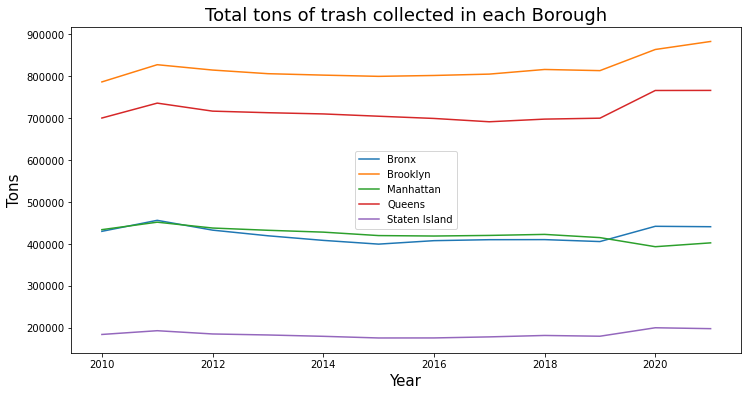

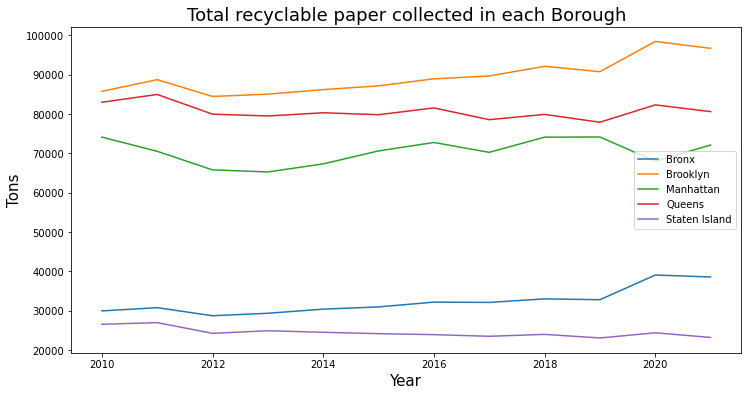

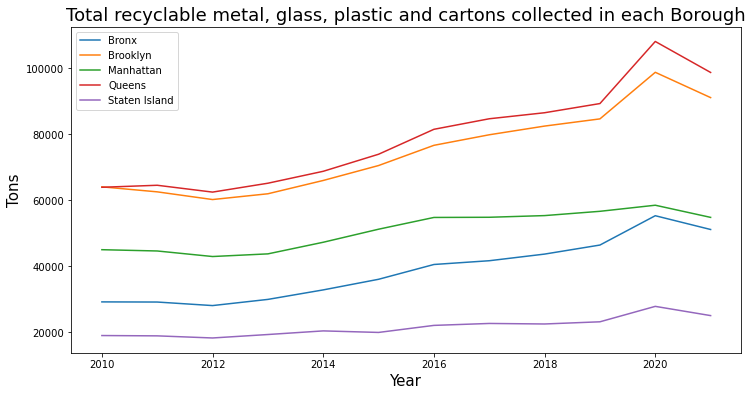

In [37]:
plt.figure(figsize = (12, 6))

df2[df2['borough'] == 'Bronx'].groupby('y')['refusetonscollected'].sum().plot()
df2[df2['borough'] == 'Brooklyn'].groupby('y')['refusetonscollected'].sum().plot()
df2[df2['borough'] == 'Manhattan'].groupby('y')['refusetonscollected'].sum().plot()
df2[df2['borough'] == 'Queens'].groupby('y')['refusetonscollected'].sum().plot()
df2[df2['borough'] == 'Staten Island'].groupby('y')['refusetonscollected'].sum().plot()
plt.legend(['Bronx', 'Brooklyn', 'Manhattan', 'Queens', 'Staten Island'])
plt.title('Total tons of trash collected in each Borough', fontsize = 18)
plt.xlabel('Year', fontsize = 15)
plt.ylabel('Tons', fontsize = 15)
plt.show()

plt.figure(figsize = (12, 6))

df2[df2['borough'] == 'Bronx'].groupby('y')['papertonscollected'].sum().plot()
df2[df2['borough'] == 'Brooklyn'].groupby('y')['papertonscollected'].sum().plot()
df2[df2['borough'] == 'Manhattan'].groupby('y')['papertonscollected'].sum().plot()
df2[df2['borough'] == 'Queens'].groupby('y')['papertonscollected'].sum().plot()
df2[df2['borough'] == 'Staten Island'].groupby('y')['papertonscollected'].sum().plot()
plt.legend(['Bronx', 'Brooklyn', 'Manhattan', 'Queens', 'Staten Island'])
plt.title('Total recyclable paper collected in each Borough', fontsize = 18)
plt.xlabel('Year', fontsize = 15)
plt.ylabel('Tons', fontsize = 15)
plt.show()

plt.figure(figsize = (12, 6))

df2[df2['borough'] == 'Bronx'].groupby('y')['mgptonscollected'].sum().plot()
df2[df2['borough'] == 'Brooklyn'].groupby('y')['mgptonscollected'].sum().plot()
df2[df2['borough'] == 'Manhattan'].groupby('y')['mgptonscollected'].sum().plot()
df2[df2['borough'] == 'Queens'].groupby('y')['mgptonscollected'].sum().plot()
df2[df2['borough'] == 'Staten Island'].groupby('y')['mgptonscollected'].sum().plot()
plt.legend(['Bronx', 'Brooklyn', 'Manhattan', 'Queens', 'Staten Island'])
plt.title('Total recyclable metal, glass, plastic and cartons collected in each Borough', fontsize = 18)
plt.xlabel('Year', fontsize = 15)
plt.ylabel('Tons', fontsize = 15)
plt.show()

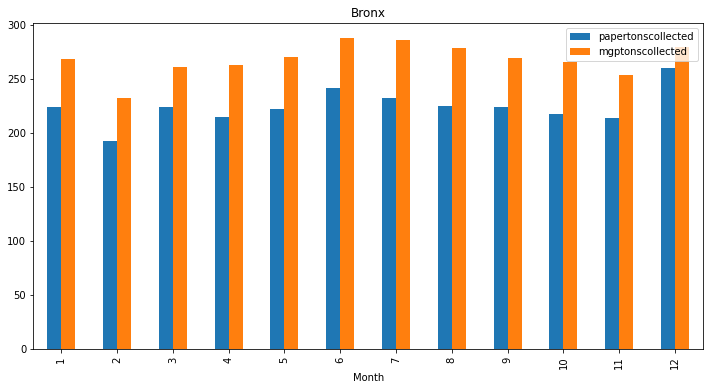

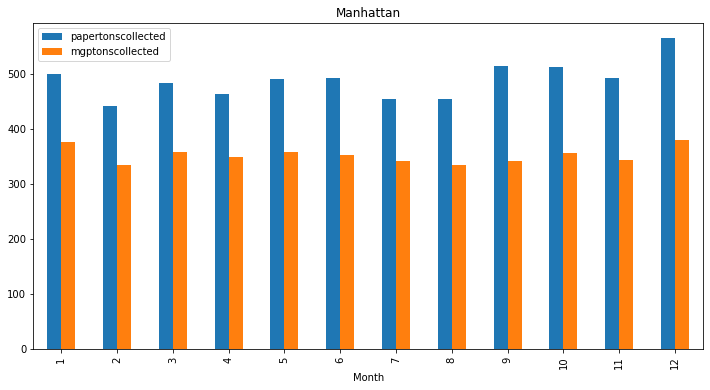

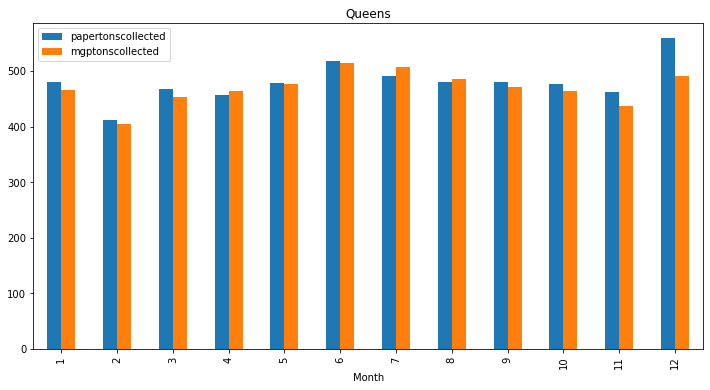

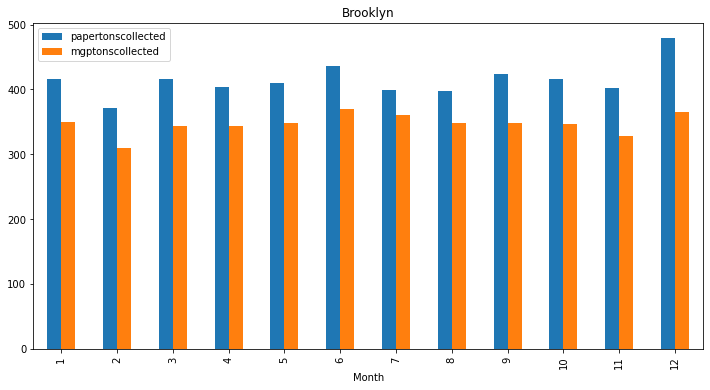

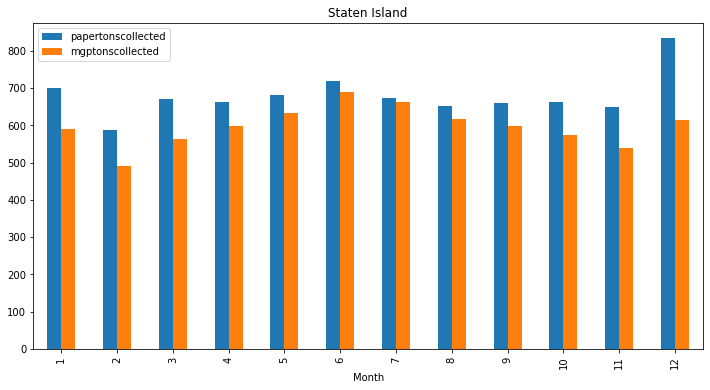

In [179]:

val = ['papertonscollected', 'mgptonscollected']

df2[df2['borough'] == 'Bronx'].groupby(['m'])[val].mean().plot(kind = 'bar', title = 'Bronx', figsize = (12, 6),xlabel = 'Month')
plt.show()
df2[df2['borough'] == 'Manhattan'].groupby(['m'])[val].mean().plot(kind = 'bar', title = 'Manhattan', figsize = (12, 6),xlabel = 'Month')
plt.show()
df2[df2['borough'] == 'Queens'].groupby(['m'])[val].mean().plot(kind = 'bar', title = 'Queens', figsize = (12, 6),xlabel = 'Month')
plt.show()
df2[df2['borough'] == 'Brooklyn'].groupby(['m'])[val].mean().plot(kind = 'bar', title = 'Brooklyn', figsize = (12, 6),xlabel = 'Month')
plt.show()
df2[df2['borough'] == 'Staten Island'].groupby(['m'])[val].mean().plot(kind = 'bar', title = 'Staten Island', figsize = (12, 6),xlabel = 'Month')
plt.show()

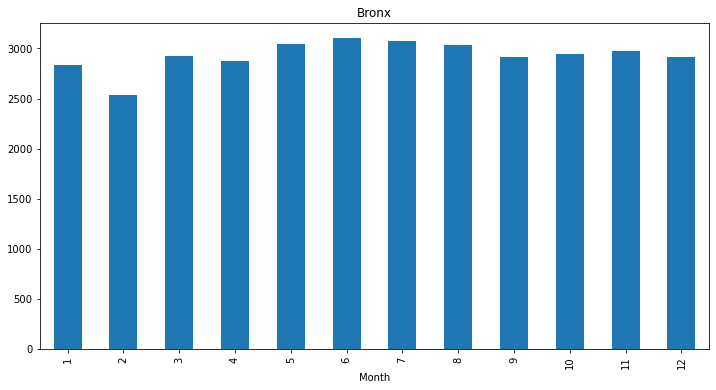

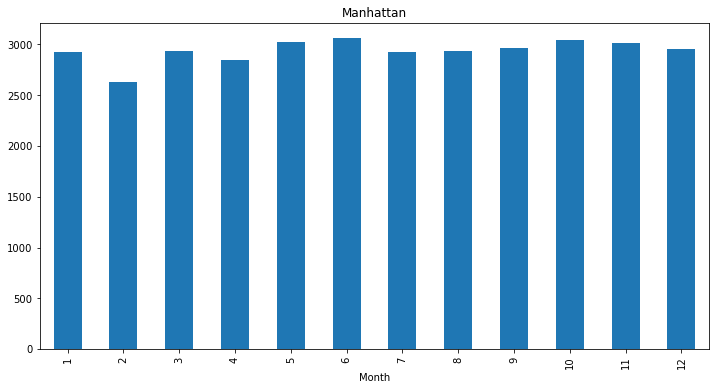

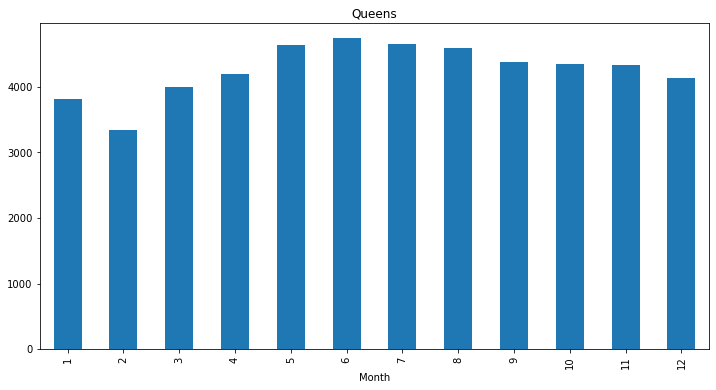

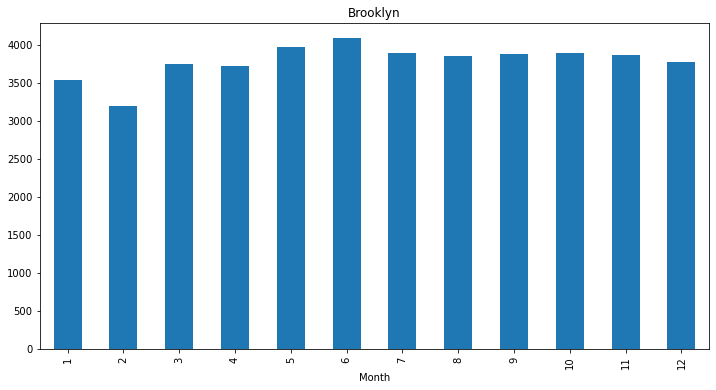

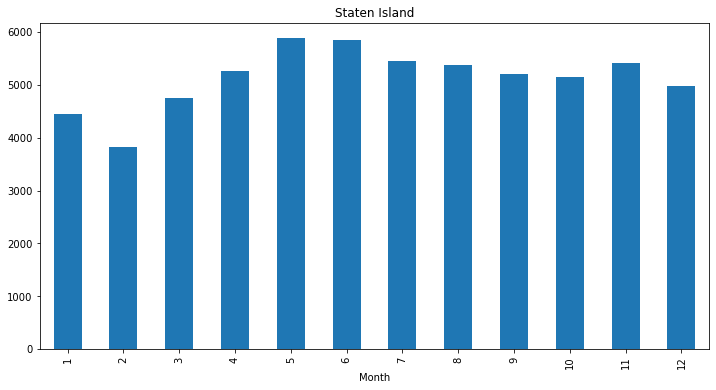

In [178]:
df2[df2['borough'] == 'Bronx'].groupby(['m'])['refusetonscollected'].mean().plot(kind = 'bar', title = 'Bronx' , figsize = (12, 6),xlabel = 'Month')
plt.show()
df2[df2['borough'] == 'Manhattan'].groupby(['m'])['refusetonscollected'].mean().plot(kind = 'bar', title = 'Manhattan', figsize = (12, 6),xlabel = 'Month')
plt.show()
df2[df2['borough'] == 'Queens'].groupby(['m'])['refusetonscollected'].mean().plot(kind = 'bar', title = 'Queens', figsize = (12, 6),xlabel = 'Month')
plt.show()
df2[df2['borough'] == 'Brooklyn'].groupby(['m'])['refusetonscollected'].mean().plot(kind = 'bar', title = 'Brooklyn',  figsize = (12, 6),xlabel = 'Month')
plt.show()
df2[df2['borough'] == 'Staten Island'].groupby(['m'])['refusetonscollected'].mean().plot(kind = 'bar', title = 'Staten Island',  figsize = (12, 6),xlabel = 'Month')
plt.show()